# Bayesian Optimization

In [2]:
import os

import sys
sys.path.append("..")

from src.scan import scan, scan_bayesian_optimization
from src.scan.decorators import response_measurements, add_noise
from src.scan.utils import plot_scan_data, print_scan_data, print_table_scan_data, scan_logger
from src.elegant import eleget, eleput
from src.core import config as cfg

In [3]:
MOTOR_RANGE = [-1e-3, 1e-3]

MOTORS = [  
    ["MG-LA1.CL1.HKICK", MOTOR_RANGE],
    ["MG-LA1.CL2.HKICK", MOTOR_RANGE],
    ["MG-LA2.CL3.HKICK", MOTOR_RANGE],
    ["MG-LA3.CL4.HKICK", MOTOR_RANGE],
    ["MG-LA4.CL5.HKICK", MOTOR_RANGE],
    ["MG-LA5.CL6.HKICK", MOTOR_RANGE],      
]

METERS =[
    "BI-LA1.PK3.Cx", 
    "BI-LA2.PK4.Cx", 
    "BI-LA3.PK5.Cx", 
    "BI-LA4.PK6.Cx",
]

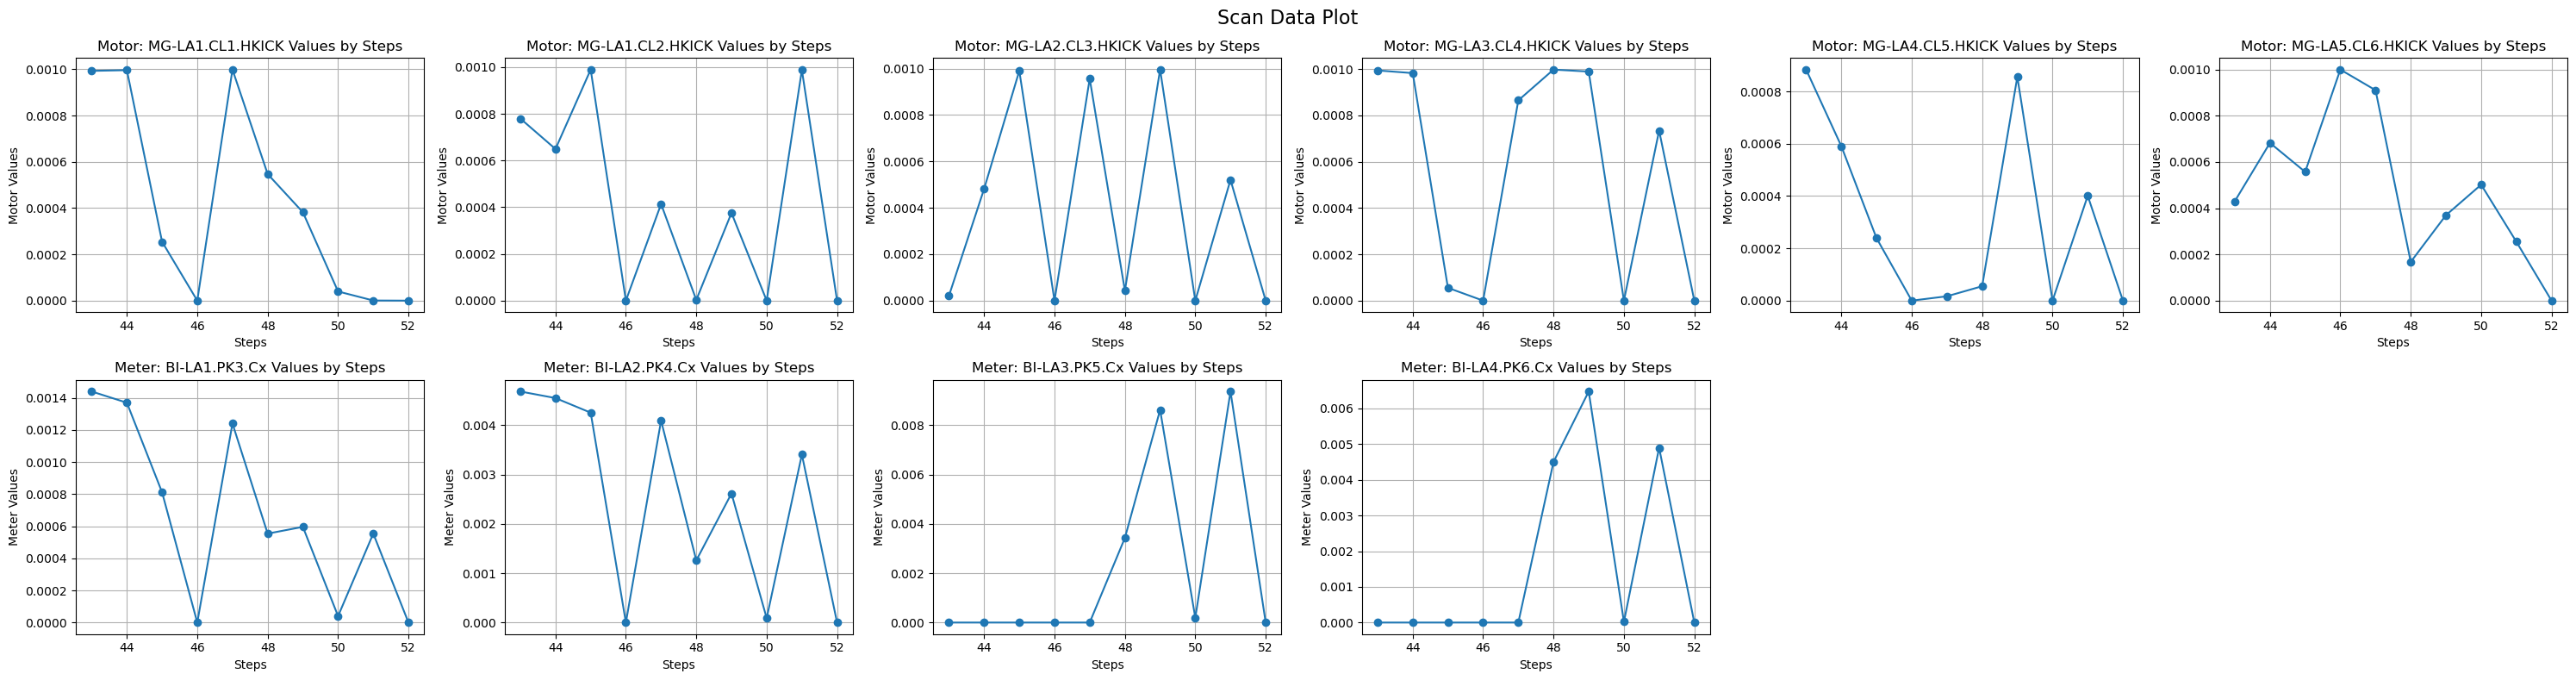

In [4]:
data_scan = scan_bayesian_optimization(
    meters=METERS, 
    motors=MOTORS, 
    get_func=add_noise(0.0)(eleget), 
    put_func=add_noise(0.0)(eleput), 
    save=False, 
    callback=[plot_scan_data], 
    verify_motor=False, 
    save_original_motor_values=False,
    sample_size=1,
)

In [6]:
data_scan

{'data': {'MG-LA1.CL1.HKICK': {0.0: {'BI-LA1.PK3.Cx': 0.0,
    'BI-LA2.PK4.Cx': 0.0,
    'BI-LA3.PK5.Cx': 0.0,
    'BI-LA4.PK6.Cx': 0.0}},
  'MG-LA1.CL2.HKICK': {0.0: {'BI-LA1.PK3.Cx': 0.0,
    'BI-LA2.PK4.Cx': 0.0,
    'BI-LA3.PK5.Cx': 0.0,
    'BI-LA4.PK6.Cx': 0.0}},
  'MG-LA2.CL3.HKICK': {0.0: {'BI-LA1.PK3.Cx': 0.0,
    'BI-LA2.PK4.Cx': 0.0,
    'BI-LA3.PK5.Cx': 0.0,
    'BI-LA4.PK6.Cx': 0.0}},
  'MG-LA3.CL4.HKICK': {0.0: {'BI-LA1.PK3.Cx': 0.0,
    'BI-LA2.PK4.Cx': 0.0,
    'BI-LA3.PK5.Cx': 0.0,
    'BI-LA4.PK6.Cx': 0.0}},
  'MG-LA4.CL5.HKICK': {0.0: {'BI-LA1.PK3.Cx': 0.0,
    'BI-LA2.PK4.Cx': 0.0,
    'BI-LA3.PK5.Cx': 0.0,
    'BI-LA4.PK6.Cx': 0.0}},
  'MG-LA5.CL6.HKICK': {0.0: {'BI-LA1.PK3.Cx': 0.0,
    'BI-LA2.PK4.Cx': 0.0,
    'BI-LA3.PK5.Cx': 0.0,
    'BI-LA4.PK6.Cx': 0.0}}},
 'metadata': {'scan_start_time': '2025-01-30T19:06:43.338618',
  'motors': ['MG-LA1.CL1.HKICK',
   'MG-LA1.CL2.HKICK',
   'MG-LA2.CL3.HKICK',
   'MG-LA3.CL4.HKICK',
   'MG-LA4.CL5.HKICK',
   'MG-LA5.CL6.HK